In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import os
import shutil
import time

# Plot Space average of u(t)

Text(0.5, 1.0, '')

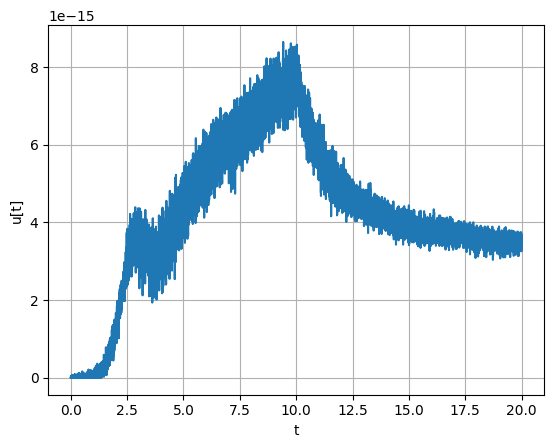

In [15]:
f = open("../fileAveout.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    a, b = row.split(" ")
    x[i] = float(a)
    y[i] = float(b)
    i = i + 1
plt.semilogy(x[0:i], np.abs(y[0:i]))

plt.xlabel("t")
plt.ylabel("u[t]")
plt.yscale("linear")
plt.grid()
plt.title("")

# Plot final state u(x, tmax)

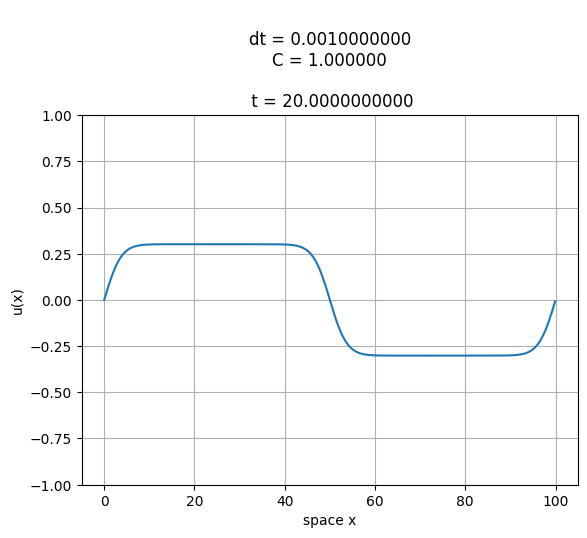

In [16]:
f = open("../tdgl_result.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        x[i-1] = float(a)
        y[i-1] = float(b)
    else:
        N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")

    i = i + 1

T = 2*float(Thalf)

#eps = 0.5
plt.plot(x[0:i-1], y[0:i-1])
#plt.ylim(-1-eps,1+eps)

label = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
label= label + "\ndt = " + str(dt)
if T > 0:
    label = label + "\nC(t) = " + Cave + " + " + A + "$\sin{2\pi t/" + str(T) + "}$"
else:
    label = label + "\nC = " + Cave
label = label + "\n t = " + tmax
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"

plt.title(label)
plt.xlabel("space x")
plt.ylabel("u(x)")
eps = 0.0005
plt.ylim(-np.sqrt(float(Cave))-eps,np.sqrt(float(Cave))+eps)
plt.grid()